# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Solve a simple Linear Regression problem with PyTorch.


# Note

Apart from the Questions, there are instruction comments throughout the notebook as well as comments inside the code cells beginning with two hashtags (##). In addition, there are #**START CODE  /  #**END CODE comments indicating the startand ending of your code sections. Pay attention not to delete these comments.

#**Q1 Solve a simple Linear Regression problem**

Find the linear relationship between a dependent variable 'y' and an independent variable 'x'.

Equation: y = 4x + 3

In [5]:
## create dummy data for training
import numpy as np
x_train = np.random.uniform(low=0.0, high=10.0, size=(15,))
print(x_train)
x_train = np.array(x_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

[2.3453181  7.92115514 9.58294551 9.12855929 0.64929492 7.42170121
 8.3950927  2.54129088 7.31725175 1.22549208 9.14435188 6.82399212
 3.32803996 1.00790558 8.47286163]


In [6]:
##create the y values according to equation y = 3x + 4
# *****START CODE
y_train = np.dot(3, x_train) + 4

# *****END CODE
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [7]:
import torch
##convert x_train and y_train numpy arrays to pytorch tensors
# *****START CODE
x_train = torch.as_tensor(x_train)
y_train = torch.as_tensor(y_train)

# *****END CODE

In [17]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression, self).__init__()
        ##Define a linear layer
        # *****START CODE
        self.linear = torch.nn.Linear(in_size, out_size)
        # *****END CODE

    def forward(self, x):
        ##forward the input through the model
        # *****START CODE
        out = self.linear(x)
        # *****END CODE
        return out

In [18]:
##define input and output dimensions of the model
# *****START CODE
in_dim =       1
out_dim =      1
# *****END CODE

LR = 0.01 
epochs = 100

model = LinearRegression(in_dim, out_dim)

In [19]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [23]:
#model.train()
for epoch in range(epochs):
    # Set all gradients to zero
    optimizer.zero_grad()

    # feed the inputs to the model, and get the outputs
    # *****START CODE
    outputs = model(x_train)
    # *****END CODE

    # calculate loss for the predicted output
    # *****START CODE
    loss = criterion(outputs, y_train)
    # *****END CODE

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 367.8415222167969
epoch 1, loss 7.653720378875732
epoch 2, loss 2.0139105319976807
epoch 3, loss 1.9074846506118774
epoch 4, loss 1.887593150138855
epoch 5, loss 1.8692302703857422
epoch 6, loss 1.8510661125183105
epoch 7, loss 1.8330785036087036
epoch 8, loss 1.8152657747268677
epoch 9, loss 1.7976264953613281
epoch 10, loss 1.7801584005355835
epoch 11, loss 1.7628607749938965
epoch 12, loss 1.745729923248291
epoch 13, loss 1.7287673950195312
epoch 14, loss 1.7119675874710083
epoch 15, loss 1.6953322887420654
epoch 16, loss 1.6788581609725952
epoch 17, loss 1.6625444889068604
epoch 18, loss 1.6463887691497803
epoch 19, loss 1.6303905248641968
epoch 20, loss 1.6145472526550293
epoch 21, loss 1.5988585948944092
epoch 22, loss 1.5833220481872559
epoch 23, loss 1.5679370164871216
epoch 24, loss 1.552700161933899
epoch 25, loss 1.5376124382019043
epoch 26, loss 1.5226714611053467
epoch 27, loss 1.507874846458435
epoch 28, loss 1.493222713470459
epoch 29, loss 1.47871291637420

Create random test data and evaluate the trained model.

In [48]:
## create 'x' values for testing
# *****START CODE
x_test = np.random.uniform(low=-10.0, high=15.0, size=(50,))
print(x_test)
x_test = np.array(x_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)


# *****END CODE

[11.87605098  7.56834899  8.41356783 -9.18768528  9.07752592 -6.26053303
 -0.39552735  0.0816785   6.62202224  5.17501422  4.4178902  -5.75916495
  5.13059448 11.54695527 -3.4684977   3.5629433   8.73796302  7.33840119
  8.86505061 -7.60898626  1.32520569  6.68982475 -1.72943656  6.51071095
 -5.55310792 -1.46631815 -6.52857342 12.00083915 -1.80219227  7.9005825
 -1.21012096 -1.52648179 -5.98302456  8.48615684 -7.44248839 14.81129408
 -6.8189001  13.76578482  8.90231174  2.01553265 -3.17682683  2.63953041
  0.5693197  -8.27499868 -9.56251676 -4.50486243  6.87189703  6.43901057
  4.97760327  1.17053639]


In [49]:
##create the corresponding testing 'y' values
# *****START CODE
##create the y values according to equation y = 3x + 4
# *****START CODE
y_test = np.dot(3, x_test) + 4

# *****END CODE
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(-1, 1)


# *****END CODE

Evaluate the model.

In [50]:
from matplotlib import pyplot as plt

model.eval()
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_test)).data.numpy()

In [51]:
##Print the predicted values and the true values
print('Predicted: ')
# *****START CODE
print( predicted)
# *****END CODE

print('True y values: ')
# *****START CODE
print(y_test)
# *****END CODE

Predicted: 
[[ 40.629395 ]
 [ 26.716665 ]
 [ 29.446495 ]
 [-27.400867 ]
 [ 31.590906 ]
 [-17.946945 ]
 [  0.9954635]
 [  2.5367115]
 [ 23.66028  ]
 [ 18.98683  ]
 [ 16.541521 ]
 [-16.32766  ]
 [ 18.843365 ]
 [ 39.566505 ]
 [ -8.929413 ]
 [ 13.78027  ]
 [ 30.494205 ]
 [ 25.973995 ]
 [ 30.904665 ]
 [-22.30209  ]
 [  6.5529733]
 [ 23.879265 ]
 [ -3.3127084]
 [ 23.300774 ]
 [-15.662149 ]
 [ -2.462906 ]
 [-18.812645 ]
 [ 41.03243  ]
 [ -3.54769  ]
 [ 27.78969  ]
 [ -1.635457 ]
 [ -2.6572185]
 [-17.050667 ]
 [ 29.680939 ]
 [-21.764345 ]
 [ 50.10945  ]
 [-19.750322 ]
 [ 46.732735 ]
 [ 31.025007 ]
 [  8.782546 ]
 [ -7.987394 ]
 [ 10.797892 ]
 [  4.111663 ]
 [-24.453133 ]
 [-28.611475 ]
 [-12.276596 ]
 [ 24.46731  ]
 [ 23.069202 ]
 [ 18.349245 ]
 [  6.0534325]]
True y values: 
[[ 39.62815   ]
 [ 26.705048  ]
 [ 29.240704  ]
 [-23.563055  ]
 [ 31.232578  ]
 [-14.781599  ]
 [  2.813418  ]
 [  4.2450356 ]
 [ 23.866066  ]
 [ 19.525042  ]
 [ 17.25367   ]
 [-13.277494  ]
 [ 19.391783  ]
 [ 38.640865 

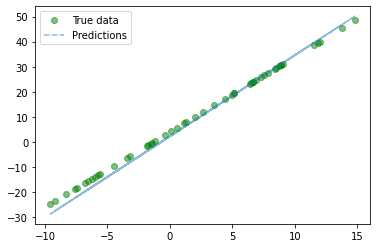

In [52]:
from matplotlib import pyplot as plt
##plot the predicted values along with the true values
# *****START CODE
plt.plot(  x_test, y_test , 'go', label='True data', alpha=0.5)
plt.plot(  x_test, predicted , '--', label='Predictions', alpha=0.5)
# *****END CODE
plt.legend(loc='best')
plt.show()